Number of segments: 585


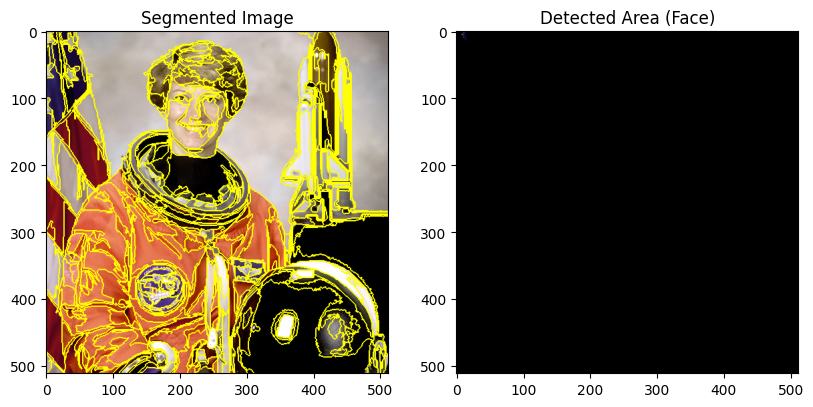

In [7]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.segmentation import felzenszwalb, mark_boundaries
import numpy as np

astro = data.astronaut()
segments_fz = felzenszwalb(astro, scale=100, sigma=0.5, min_size=50)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title("Segmented Image")
plt.imshow(mark_boundaries(astro, segments_fz))
face_segment = segments_fz == 1  # Start with 1, and adjust if needed
highlighted = astro.copy()
plt.subplot(1, 3, 2)
plt.title("Detected Area (Face)")
plt.imshow(highlighted)
print(f"Number of segments: {len(np.unique(segments_fz))}")

plt.show()


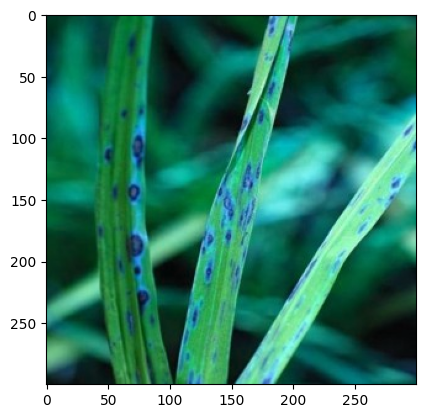

Number of segments: 85


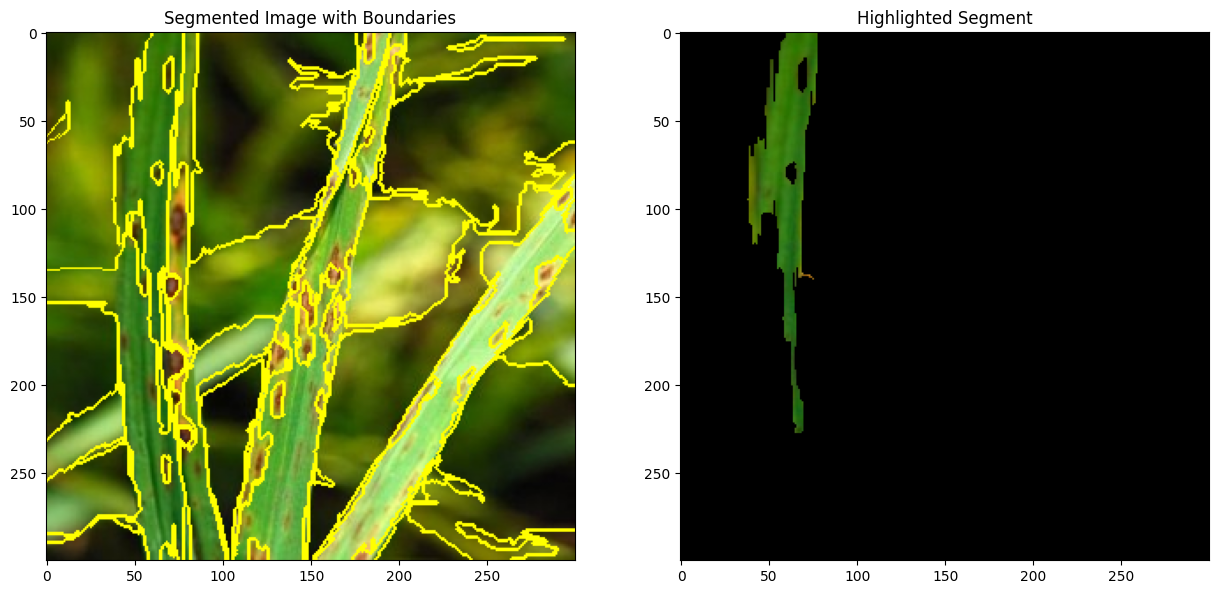

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, mark_boundaries
image = cv2.imread('img/leaf.jpg')

img_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_gray = rgb2gray(img_color)
img_fel = felzenszwalb(img_color, scale=200, sigma=0.5, min_size=50)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title("Segmented Image with Boundaries")
plt.imshow(mark_boundaries(img_color, img_fel))
segment_number = 1  # Start with 1 and adjust as necessary
face_segment = img_fel == segment_number
highlighted = img_color.copy()
highlighted[~face_segment] = [0, 0, 0]
plt.subplot(1, 2, 2)
plt.title("Highlighted Segment")
plt.imshow(highlighted)
print(f"Number of segments: {len(np.unique(img_fel))}")

plt.show()


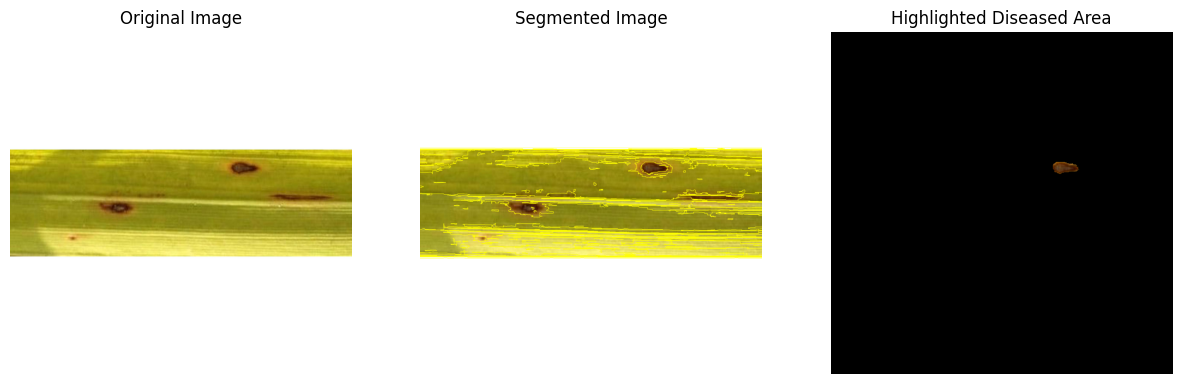

Number of segments: 346


In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2hsv
from skimage.segmentation import felzenszwalb, mark_boundaries

# Load the image
image = cv2.imread('img/a.jpg')
img_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_fel = felzenszwalb(img_color, scale=300, sigma=0.5, min_size=50)
disease_mask = np.zeros(img_color.shape[:2], dtype=bool)

for segment_value in np.unique(img_fel):
    segment_mask = img_fel == segment_value
    
    if np.mean(img_color[segment_mask], axis=0)[0] < 100:  
        disease_mask = segment_mask
        break


highlighted_disease = np.zeros_like(img_color)
highlighted_disease[disease_mask] = img_color[disease_mask]


plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_color)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Segmented Image")
plt.imshow(mark_boundaries(img_color, img_fel))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Highlighted Diseased Area")
plt.imshow(highlighted_disease)
plt.axis('off')

plt.show()


print(f"Number of segments: {len(np.unique(img_fel))}")
